In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df= pd.read_csv('Netflix TV Shows and Movies.csv', index_col= 'index')
df.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5283 non-null   object 
 1   title              5283 non-null   object 
 2   type               5283 non-null   object 
 3   description        5278 non-null   object 
 4   release_year       5283 non-null   int64  
 5   age_certification  2998 non-null   object 
 6   runtime            5283 non-null   int64  
 7   imdb_id            5283 non-null   object 
 8   imdb_score         5283 non-null   float64
 9   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 454.0+ KB


In [18]:
df.isnull().sum()

id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [19]:
df.dtypes

id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

In [20]:
df.dropna(inplace= True)

In [21]:
df.isnull().sum()

id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

In [23]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [36]:
IMDB_Score = df.groupby(['title', 'type'], as_index= False)['imdb_score'].sum().sort_values('imdb_score', ascending= False).head(20)
IMDB_Score

,title,type,imdb_score
555,Cowboy Bebop,SHOW,15.5
2387,The Good Cop,SHOW,14.6
1246,Kakegurui,SHOW,14.0
1542,Monster,MOVIE,13.8
490,Christine,MOVIE,13.6
61,A Nightmare on Elm Street,MOVIE,12.6
780,Extraction,MOVIE,10.8
1269,Khawatir,SHOW,9.6
0,#ABtalks,SHOW,9.6
387,Breaking Bad,SHOW,9.5


<Axes: xlabel='title', ylabel='imdb_score'>

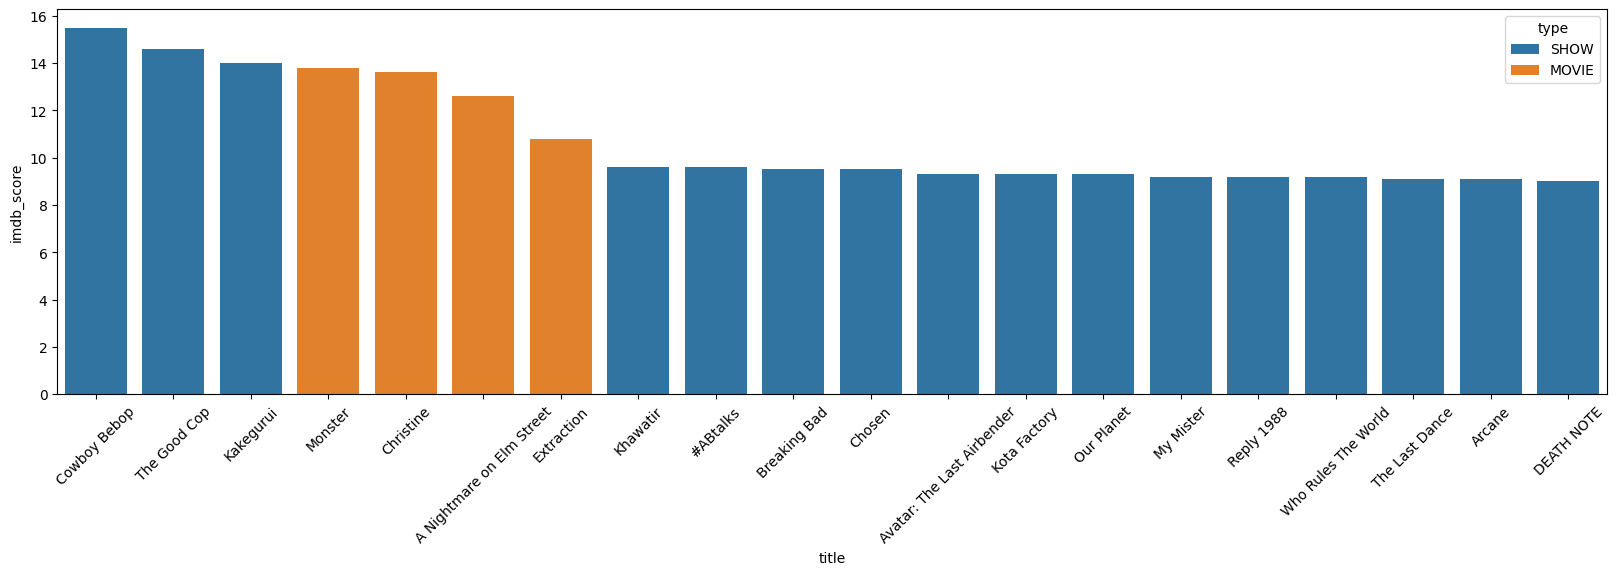

In [41]:
plt.figure(figsize= (20,5))
plt.xticks(rotation= 45)
sns.barplot(data= IMDB_Score, x='title', y= 'imdb_score', hue= 'type')

In [57]:
IMDB_Score = df.groupby(['title', 'type'], as_index= False)['imdb_score'].sum().sort_values('imdb_score', ascending= False)
IMDB_Score

,title,type,imdb_score
555,Cowboy Bebop,SHOW,15.5
2387,The Good Cop,SHOW,14.6
1246,Kakegurui,SHOW,14.0
1542,Monster,MOVIE,13.8
490,Christine,MOVIE,13.6
...,...,...,...
980,Hajwala: The Missing Engine,MOVIE,2.1
784,FRED 3: Camp Fred,MOVIE,2.0
1859,Racket Boys,SHOW,1.8
2676,Thomas & Friends: All Engines Go!,SHOW,1.7


In [58]:
top_movie = IMDB_Score[IMDB_Score['type'] == 'MOVIE']
top_movie

,title,type,imdb_score
1542,Monster,MOVIE,13.8
490,Christine,MOVIE,13.6
61,A Nightmare on Elm Street,MOVIE,12.6
780,Extraction,MOVIE,10.8
465,Chhota Bheem & Krishna in Mayanagari,MOVIE,9.0
...,...,...,...
550,Cosmic Sin,MOVIE,2.5
360,Bobbleheads: The Movie,MOVIE,2.4
1678,Nothing to Lose,MOVIE,2.3
980,Hajwala: The Missing Engine,MOVIE,2.1


<Axes: xlabel='title', ylabel='imdb_score'>

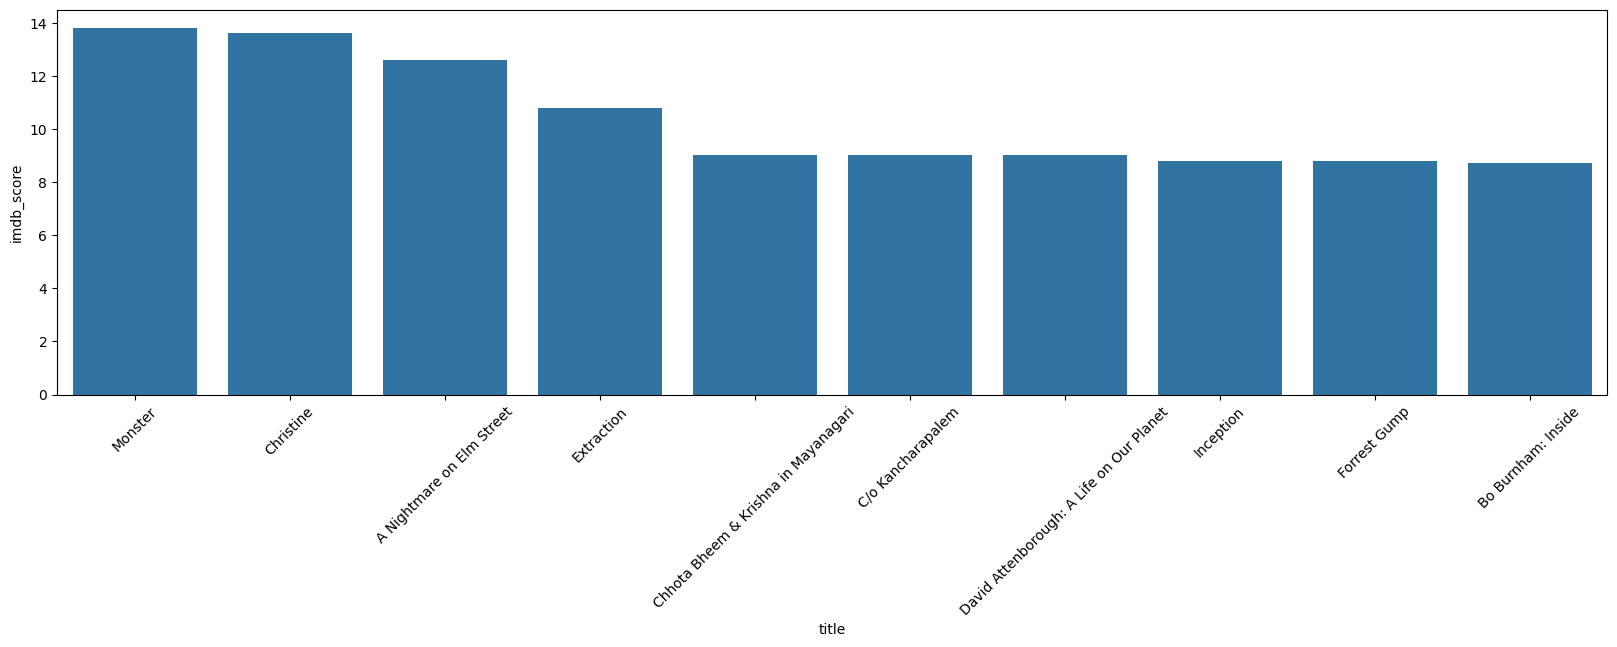

In [60]:
plt.figure(figsize= (20,5))
plt.xticks(rotation= 45)
sns.barplot(data= top_movie.head(10), x='title', y= 'imdb_score')

In [61]:
top_show = IMDB_Score[IMDB_Score['type'] == 'SHOW']
top_show

,title,type,imdb_score
555,Cowboy Bebop,SHOW,15.5
2387,The Good Cop,SHOW,14.6
1246,Kakegurui,SHOW,14.0
1269,Khawatir,SHOW,9.6
0,#ABtalks,SHOW,9.6
...,...,...,...
1100,Hype House,SHOW,2.3
56,A House of Blocks,SHOW,2.3
1859,Racket Boys,SHOW,1.8
2676,Thomas & Friends: All Engines Go!,SHOW,1.7


<Axes: xlabel='title', ylabel='imdb_score'>

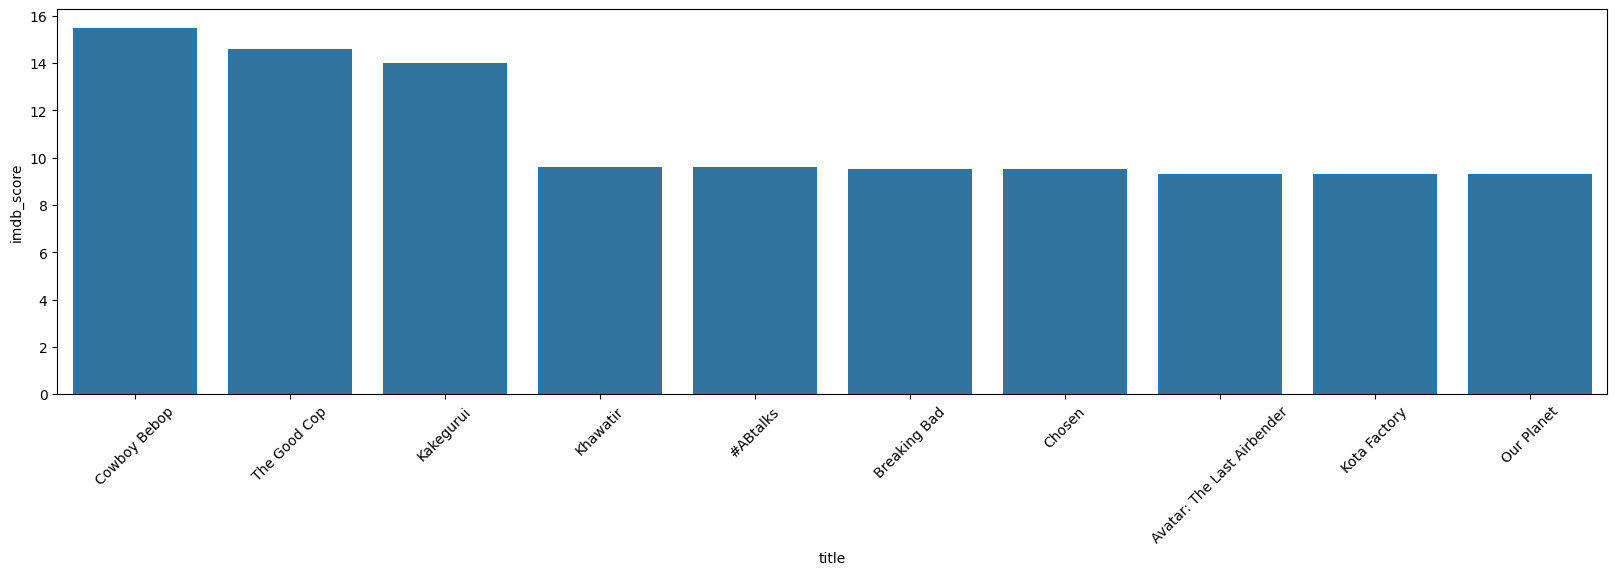

In [62]:
plt.figure(figsize= (20,5))
plt.xticks(rotation= 45)
sns.barplot(data= top_show.head(10), x='title', y= 'imdb_score')

In [86]:
sort_movie = df[df['type'] == 'MOVIE'].sort_values('imdb_score', ascending= False)
sort_movie.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
3172,tm853783,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,tt11989890,9.0,31180.0
822,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,Bheem and his Friends are having a great time ...,2011,G,66,tt16235600,9.0,5.0
2685,tm432327,C/o Kancharapalem,MOVIE,From a schoolboyâ€™s crush to a middle-aged ba...,2018,PG,152,tt7391996,9.0,6562.0
101,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,tt0109830,8.8,1994599.0
246,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,tt1375666,8.8,2268288.0


<Axes: xlabel='title', ylabel='imdb_score'>

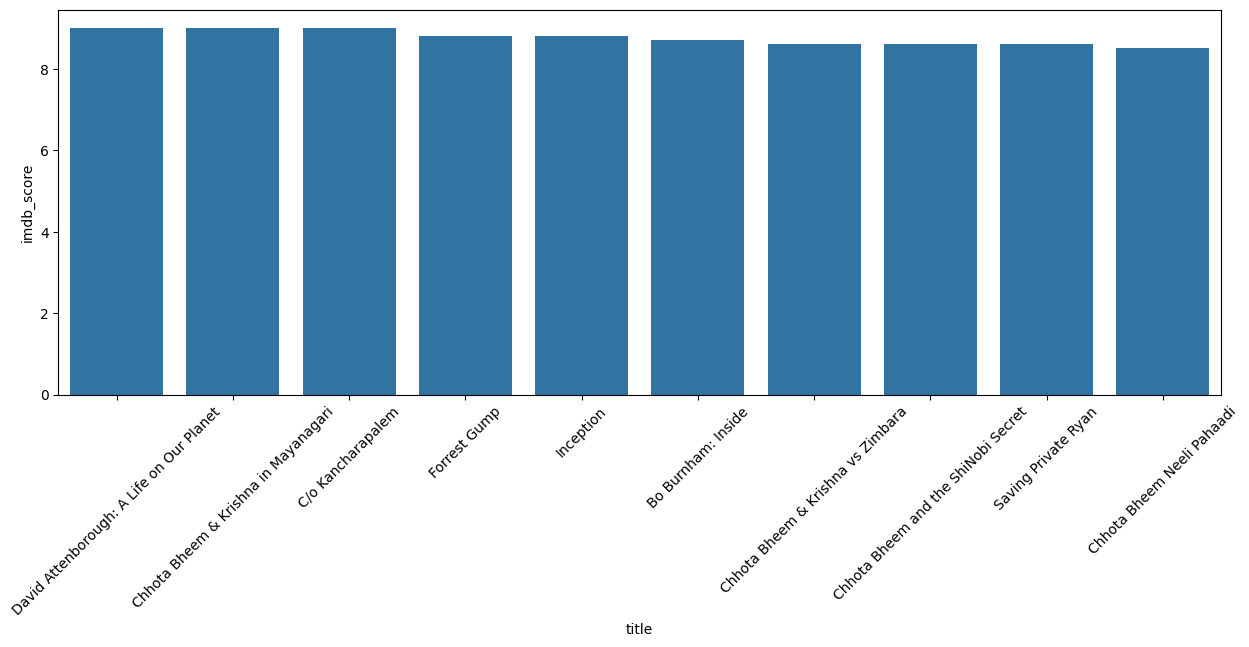

In [87]:
plt.figure(figsize= (15,5))
plt.xticks(rotation= 45)
sns.barplot(data= sort_movie.head(10), x= 'title', y= 'imdb_score' )

In [88]:
sort_show = df[df['type'] == 'SHOW'].sort_values('imdb_score', ascending= False)
sort_show.head()

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
index,,,,,,,,,,
2787,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,tt12635254,9.6,7.0
622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.6,3046.0
229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
3597,ts90621,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,tt9432978,9.3,66985.0
3144,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,tt9253866,9.3,41386.0


<Axes: xlabel='title', ylabel='imdb_score'>

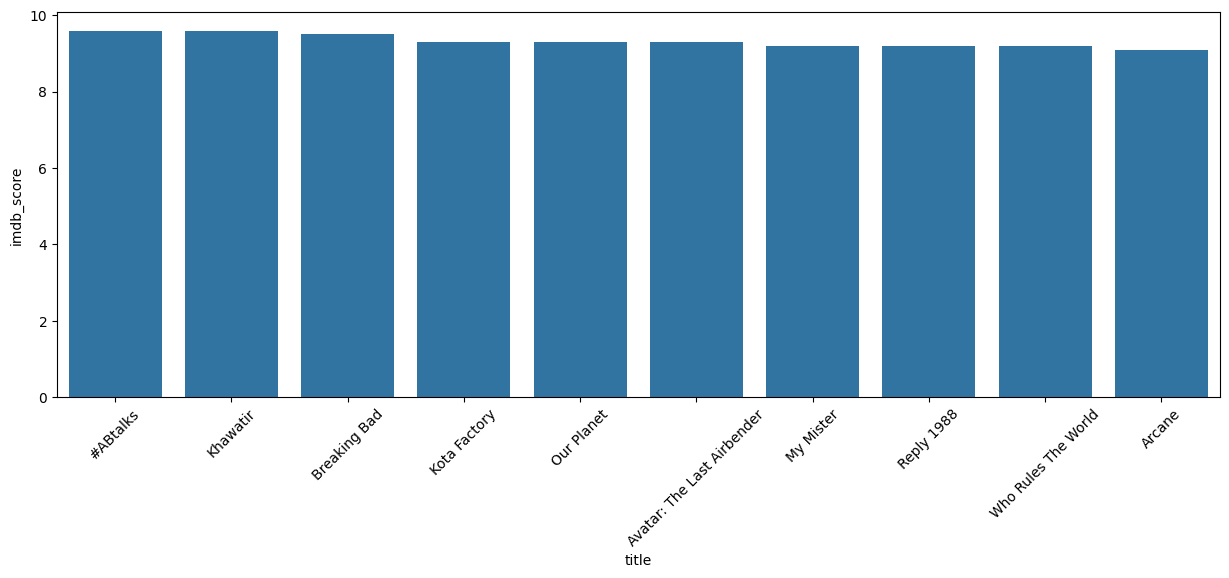

In [89]:
plt.figure(figsize= (15,5))
plt.xticks(rotation= 45)
sns.barplot(data= sort_show.head(10), x= 'title', y= 'imdb_score' )

In [94]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [98]:
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'NC-17'], dtype=object)

In [110]:
age_group = df['age_certification'].value_counts()
age_group

age_certification
TV-MA    792
R        546
TV-14    436
PG-13    418
PG       236
TV-PG    172
G        105
TV-Y7    104
TV-Y      93
TV-G      72
NC-17     13
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

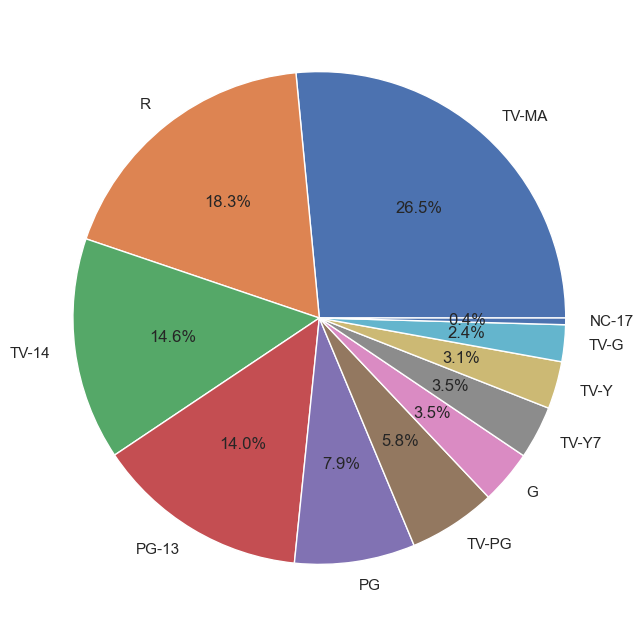

In [126]:
plt.figure(figsize= (25,8))
plt.pie(age_group, 
        autopct = '%1.1f%%' ,
        labels= age_group.index)
plt.show